In [2]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree
import sklearn.metrics
import sklearn.model_selection

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
X_pandas = pd.DataFrame()
y_pandas = pd.DataFrame()
for i in range(1,6,1):
    dataset_data = unpickle('cifar-10-batches-py/data_batch_%d'%i)
    y = dataset_data[b'labels']
    X = dataset_data[b'data']
    X_pandas = X_pandas.append(pd.DataFrame(X))
    y_pandas = y_pandas.append(pd.DataFrame(y))

In [5]:
X_pandas.head()

0     1     2     3     4     5     6     7     8     9     ...  3062  \
0    59    43    50    68    98   119   139   145   149   149  ...    59   
1   154   126   105   102   125   155   172   180   142   111  ...    22   
2   255   253   253   253   253   253   253   253   253   253  ...    78   
3    28    37    38    42    44    40    40    24    32    43  ...    53   
4   170   168   177   183   181   177   181   184   189   189  ...    92   

   3063  3064  3065  3066  3067  3068  3069  3070  3071  
0    58    65    59    46    57   104   140    84    72  
1    42    67   101   122   133   136   139   142   144  
2    83    80    69    66    72    79    83    83    84  
3    39    59    42    44    48    38    28    37    46  
4    88    85    82    83    79    78    82    78    80  

[5 rows x 3072 columns]

In [6]:
y_pandas.head()

0
0  6
1  9
2  9
3  4
4  1

In [7]:
X_train = X_pandas.to_numpy()
y_train = y_pandas.to_numpy()
print(X_train.shape,y_train.shape)
print("X:", X_train.shape, X_train.dtype)
y_train = y_train.reshape(1,-1).squeeze()
print(y_train)
print("y:", y_train.shape, y_train.dtype)
# y_train = np.zeros((X_train.shape[0], 10))
# for index, i in enumerate(y):
#     y_train[index, i[0]] = 1

(50000, 3072) (50000, 1)
X: (50000, 3072) uint8
[6 9 9 ... 9 1 1]
y: (50000,) int64


In [8]:
dataset_data = unpickle('cifar-10-batches-py/test_batch')
y_test = np.array(dataset_data[b'labels'])
X_test = np.array(dataset_data[b'data'])
print(y_test)
print("X:", X_test.shape, X_test.dtype)
print("y:", y_test.shape, y_test.dtype)

[3 8 8 ... 5 1 7]
X: (10000, 3072) uint8
y: (10000,) int32


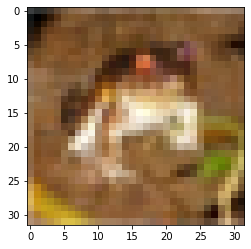

In [9]:
#See first image plot
plt.imshow(X_train[0].reshape(3,32,32).transpose(1,2,0))

In [10]:
X_train = torch.tensor(X_train.reshape(-1, 3, 32, 32) / 255, dtype=torch.float)
y_train = torch.LongTensor(y_train)

In [11]:
dataset_data = unpickle('cifar-10-batches-py/test_batch')
y_test = torch.tensor(y_test, dtype=torch.float)
X_test = np.interp(X_test, (0, 255), (-1, 1))
X_test = torch.tensor(X_test.reshape(-1, 3, 32, 32), dtype=torch.float)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([50000, 3, 32, 32]) torch.Size([50000])
torch.Size([10000, 3, 32, 32]) torch.Size([10000])


In [12]:
X_train_np = X_train.detach().numpy()
X_train_np = np.reshape(X_train_np,((X_train_np.shape[0], -1)))
y_train_np = y_train.detach().numpy()

X_test_np = X_test.detach().numpy()
X_test_np = np.reshape(X_test_np,((X_test_np.shape[0], -1)))
y_test_np = y_test.detach().numpy()
print(X_train_np.shape)
print(y_train_np)
# param_grid={
#     'max_depth': np.arange(1, 10, 1),
# }

dt_classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 10, random_state = 0)
# dt_classifier = sklearn.tree.DecisionTreeClassifier()
# grid_search_cv = sklearn.model_selection.GridSearchCV(dt_classifier, param_grid, cv=10)
dt_classifier.fit(X_train_np, y_train_np)
# grid_search_cv.fit(X_train_np, y_train_np)

# print(grid_search_cv.best_params_)
# print(grid_search_cv.best_estimator_)
# print(grid_search_cv.best_score_)

y_predicted = dt_classifier.predict(X_train_np)
print("Training set accuracy score for decision trees: {}".format(
    sklearn.metrics.accuracy_score(y_train_np, y_predicted)
))

y_test_predicted = dt_classifier.predict(X_test_np)
print("Testing set accuracy score for decision trees: {}".format(
    sklearn.metrics.accuracy_score(y_test_np, y_test_predicted)
))

(50000, 3072)
[6 9 9 ... 9 1 1]
Training set accuracy score for decision trees: 0.42642
Testing set accuracy score for decision trees: 0.1879


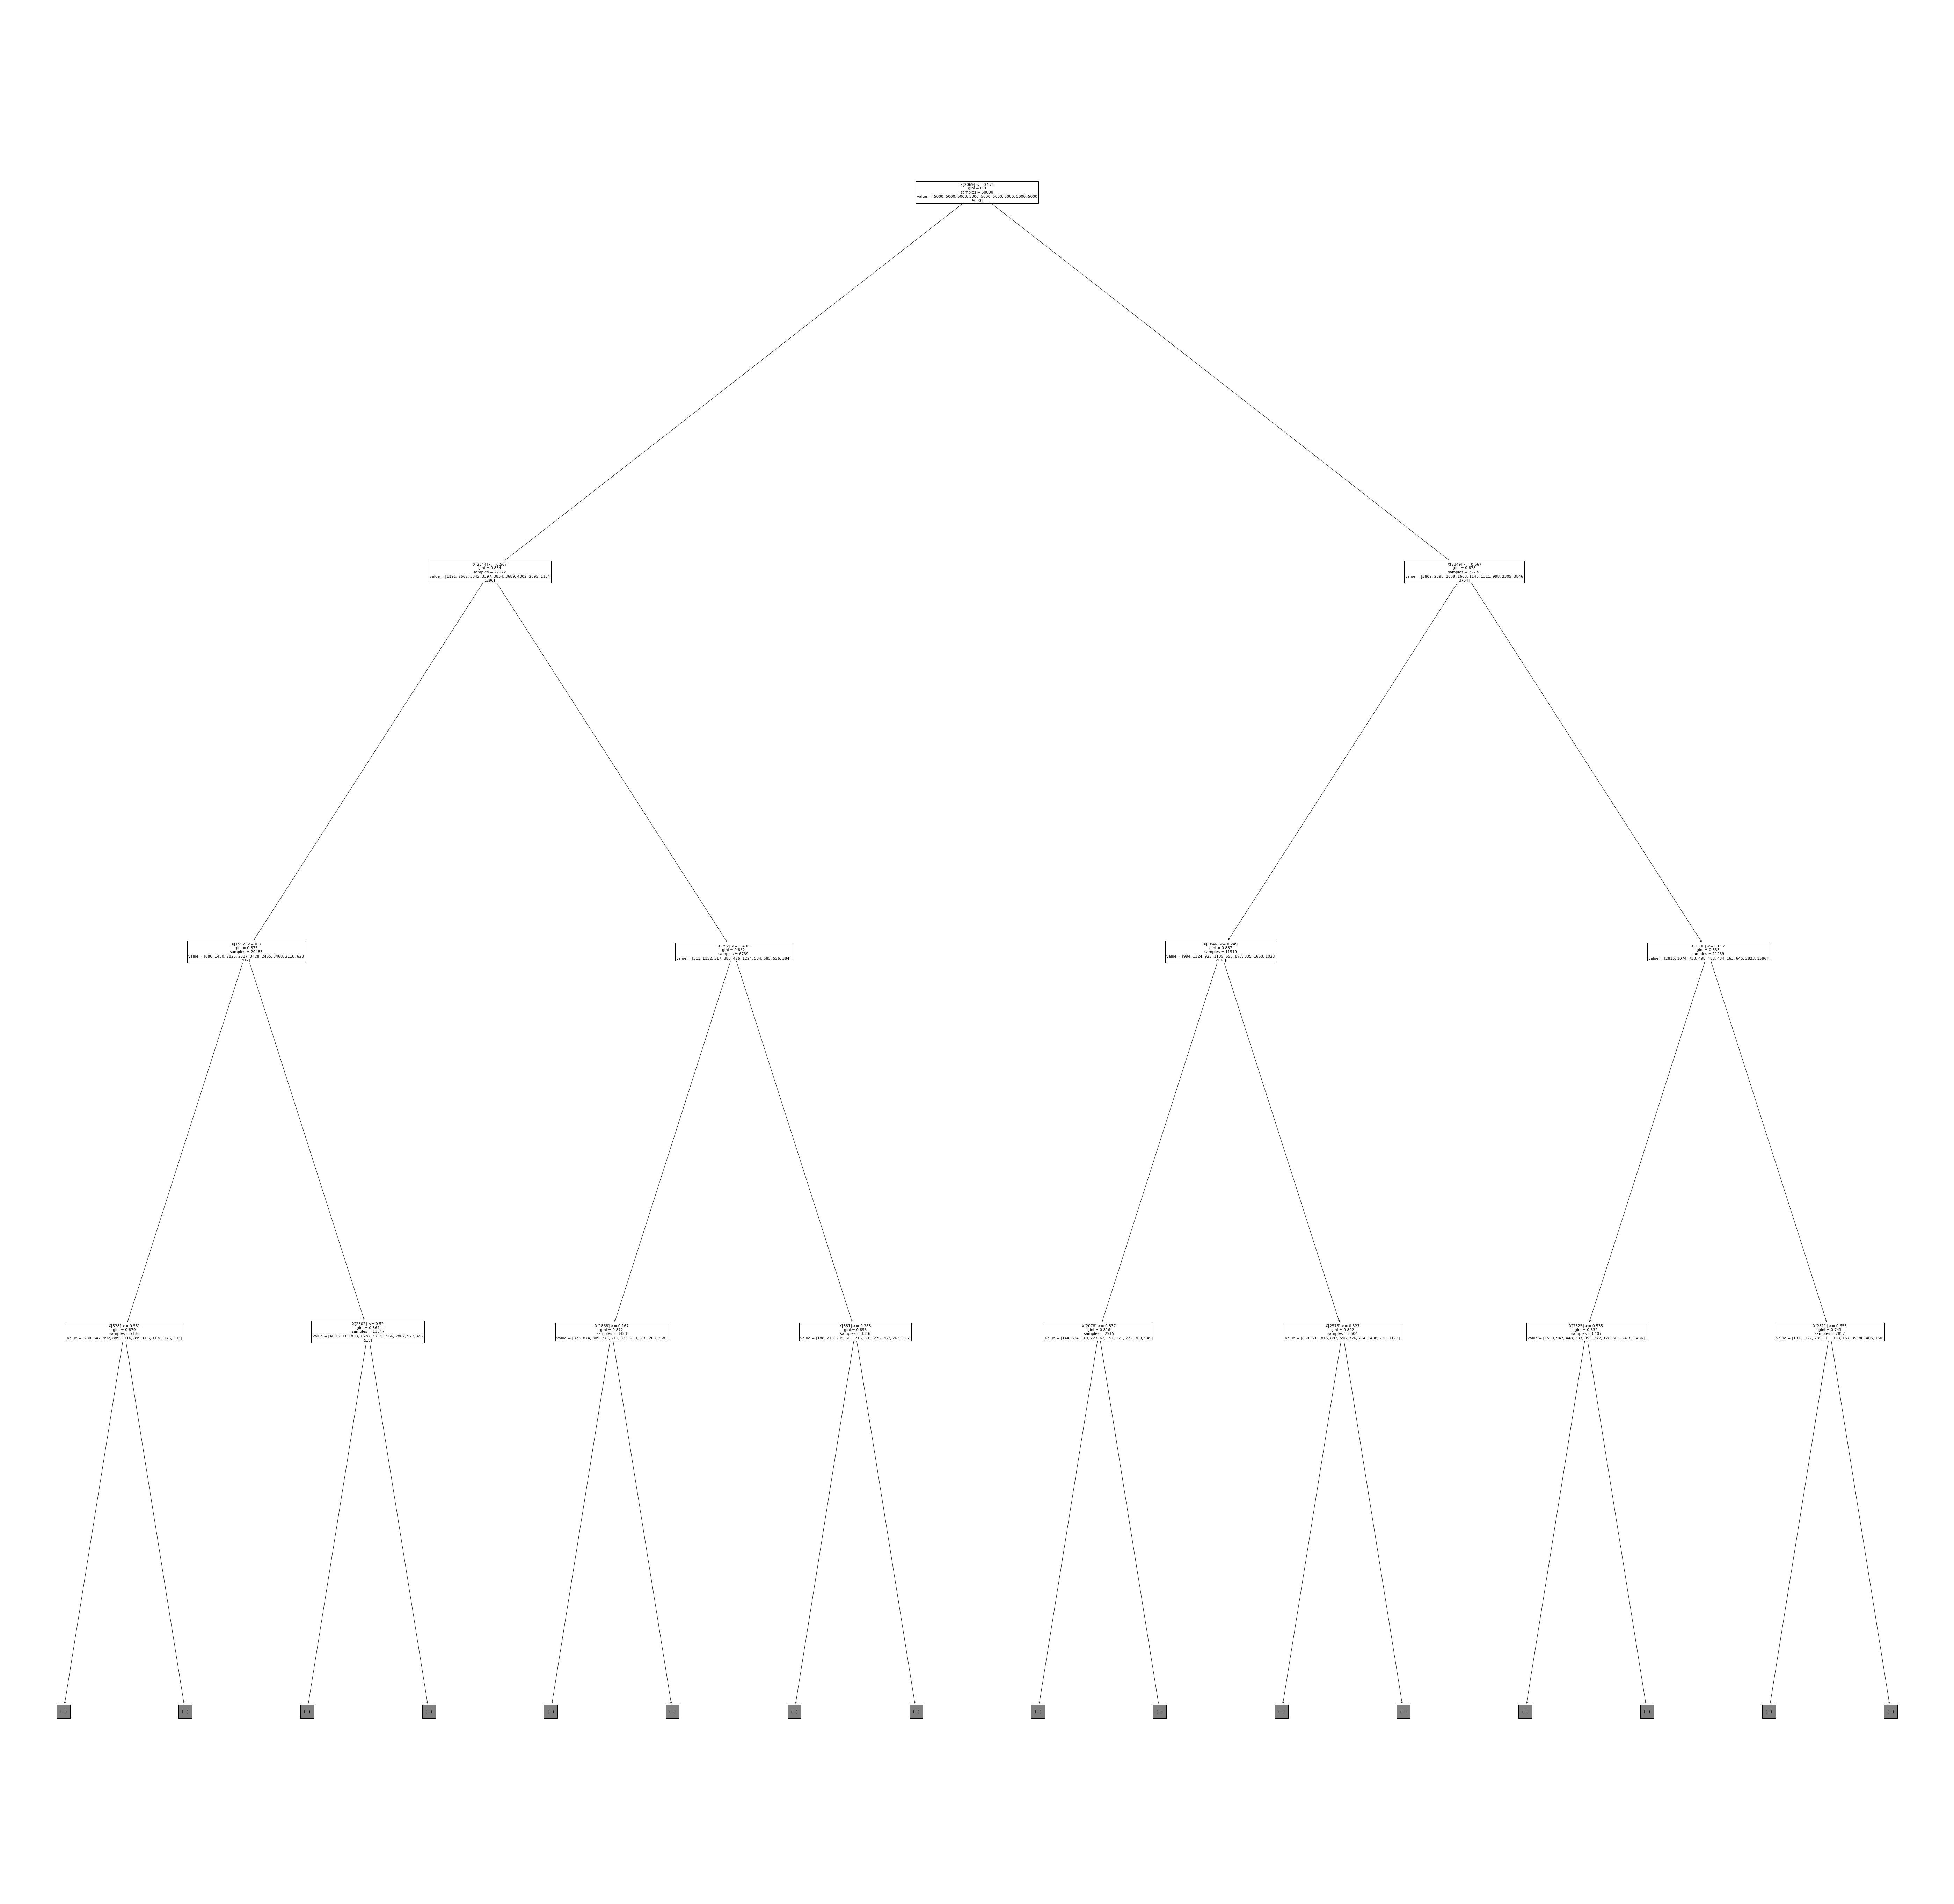

In [19]:
plt.figure(figsize=(100,100))
sklearn.tree.plot_tree(dt_classifier, max_depth=3);